### Análisis exploratorio de datos (EDA)

In [2]:
#exportar librerias necesarias
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
#import ace_tools as tools
from scipy.stats import gaussian_kde
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
import nbformat
import os

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df_calendar = pd.read_csv('data_clean/calendar.csv')
df_list_de = pd.read_csv('data_clean/listings_detailed.csv')
df_list = pd.read_csv('data_clean/listings.csv')
df_neighbour = pd.read_csv('data_clean/neighbourhoods.csv')
df_reviws_de = pd.read_csv('data_clean/reviews_detailed.csv')
df_reviws_su = pd.read_csv('data_clean/reviews_summary.csv')

1. Distribución de Precios de Alquiler por Noche

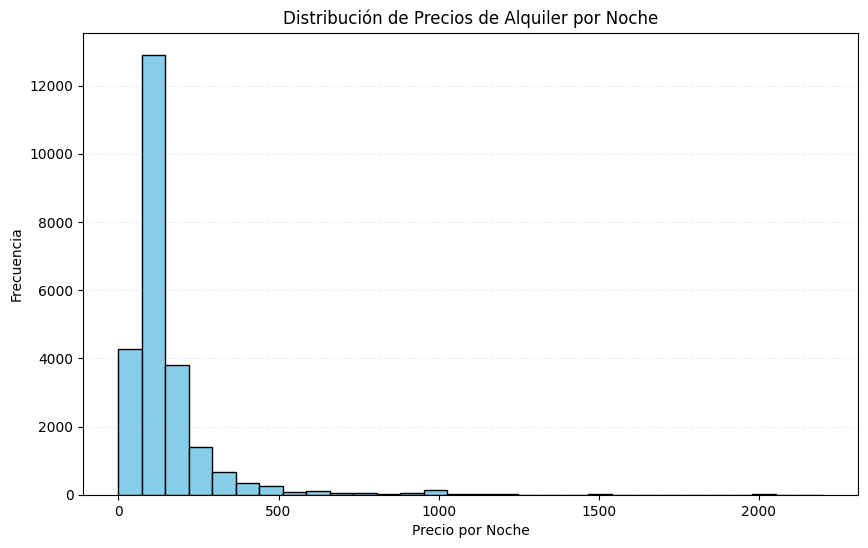

In [5]:
# Ajustar el histograma para que el eje x muestre solo el rango de 0 a 10,000
plt.figure(figsize=(10, 6))
plt.hist(df_list_de['price'].dropna(), bins=30, edgecolor='black', color='skyblue', range=(0, 2200))
plt.xlabel('Precio por Noche')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Alquiler por Noche')
plt.grid(axis='y', linestyle='--', alpha=0.2)

plt.show()

2. Ocupación mensual promedio de propiedades

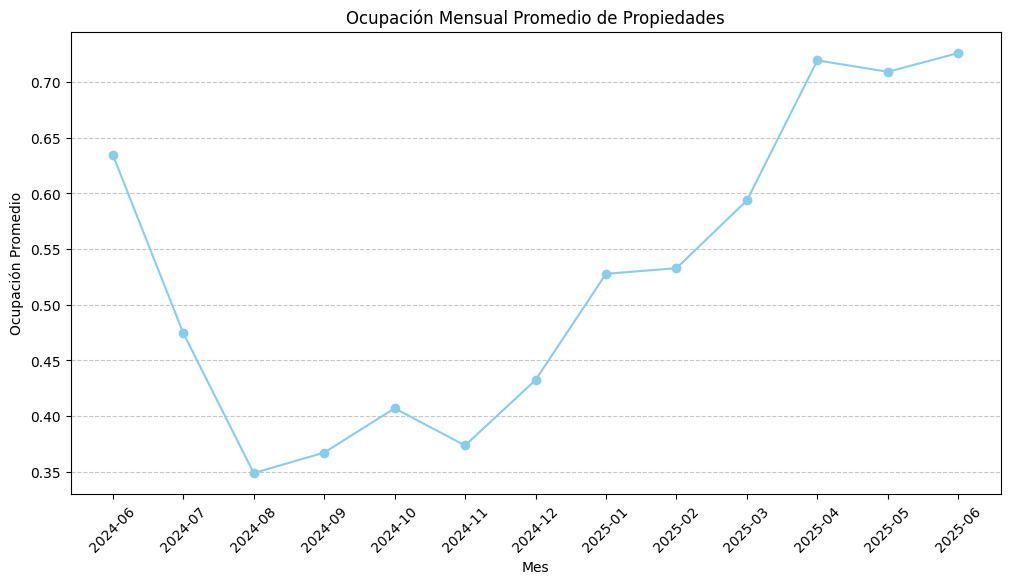

In [6]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')
# de la columna 'date' pillar el mes 
df_calendar['month'] = df_calendar['date'].dt.to_period('M') 
# Asumir que 'available' es una columna binaria (e.g., 't'/'f') y transformar a 1/0
df_calendar['available'] = df_calendar['available'].map({'t': 1, 'f': 0})

# Calcular la ocupación promedio (1 - disponibilidad) por mes
monthly_occupancy = df_calendar.groupby('month')['available'].apply(lambda x: 1 - x.mean())

plt.figure(figsize=(12, 6))
plt.plot(monthly_occupancy.index.astype(str), monthly_occupancy, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Mes')
plt.ylabel('Ocupación Promedio')
plt.title('Ocupación Mensual Promedio de Propiedades')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
    
plt.show()

In [7]:
df_calendar['date'].dtype

dtype('<M8[ns]')

<Figure size 3200x1600 with 0 Axes>

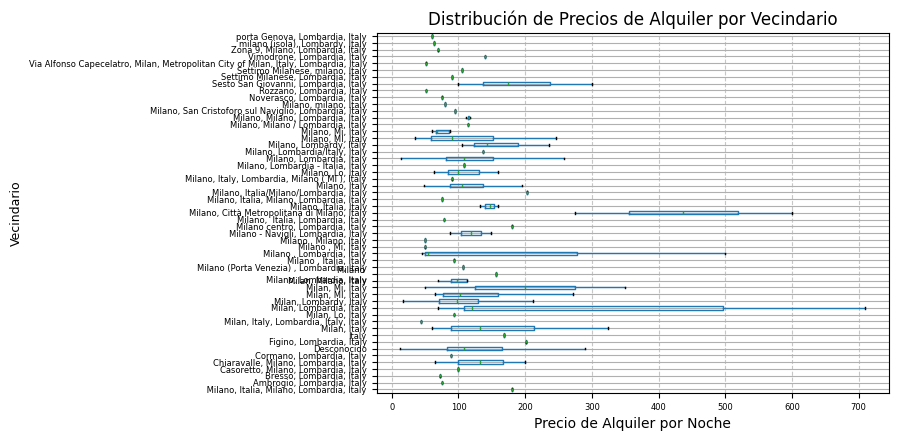

In [8]:
# Crear el gráfico boxplot de precios de alquiler por vecindario
plt.figure(figsize=(32, 16))
df_list_de.boxplot(column='price', by='neighbourhood', vert=False, showfliers=False, fontsize=6)
plt.xlabel('Precio de Alquiler por Noche')
plt.ylabel('Vecindario', fontsize=9)
plt.title('Distribución de Precios de Alquiler por Vecindario')
plt.suptitle('')  # Elimina el título adicional que matplotlib agrega por defecto
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<Figure size 3200x1600 with 0 Axes>

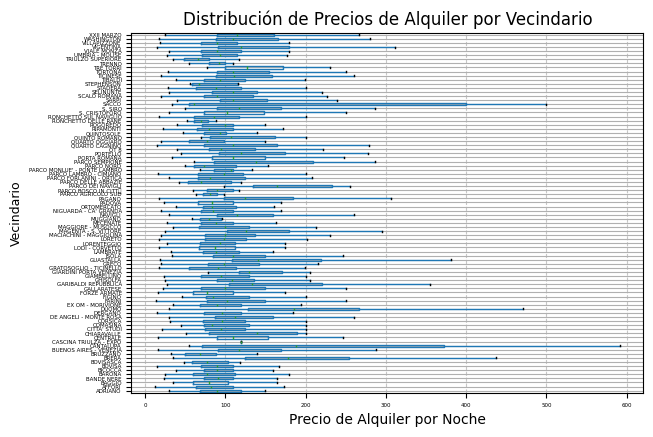

In [9]:
# Crear el gráfico boxplot de precios de alquiler por vecindario
plt.figure(figsize=(32, 16))
df_list.boxplot(column='price', by='neighbourhood', vert=False, showfliers=False, fontsize=4)
plt.xlabel('Precio de Alquiler por Noche')
plt.ylabel('Vecindario', fontsize=9)
plt.title('Distribución de Precios de Alquiler por Vecindario')
plt.suptitle('')  # Elimina el título adicional que matplotlib agrega por defecto
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

5. Frecuencia de Reseñas y Calificaciones

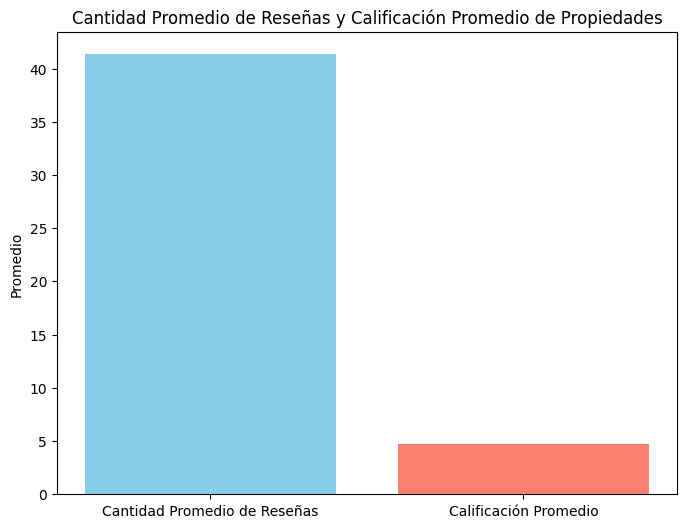

In [11]:
# Calcular la cantidad de reseñas por propiedad en `df_reviws_de`
average_reviews = df_reviws_de.groupby('listing_id')['comments'].count().mean()

# Calcular la calificación promedio por propiedad en `df_reviws_de`
average_rating = df_list_de['review_scores_rating'].mean()

# Crear un gráfico de barras para mostrar los resultados
plt.figure(figsize=(8, 6))
plt.bar(['Cantidad Promedio de Reseñas', 'Calificación Promedio'], [average_reviews, average_rating], color=['skyblue', 'salmon'])

# Añadir etiquetas y título
plt.ylabel('Promedio')
plt.title('Cantidad Promedio de Reseñas y Calificación Promedio de Propiedades')

# Mostrar el gráfico
plt.show()

In [12]:
df_list_de['review_scores_rating']

0        4.89
1        4.91
2        4.65
3        4.90
4        4.68
         ... 
24341    4.83
24342    4.83
24343    4.83
24344    4.83
24345    4.83
Name: review_scores_rating, Length: 24346, dtype: float64

6. Distribución de Tamaño de Propiedades (Dormitorios y Camas)

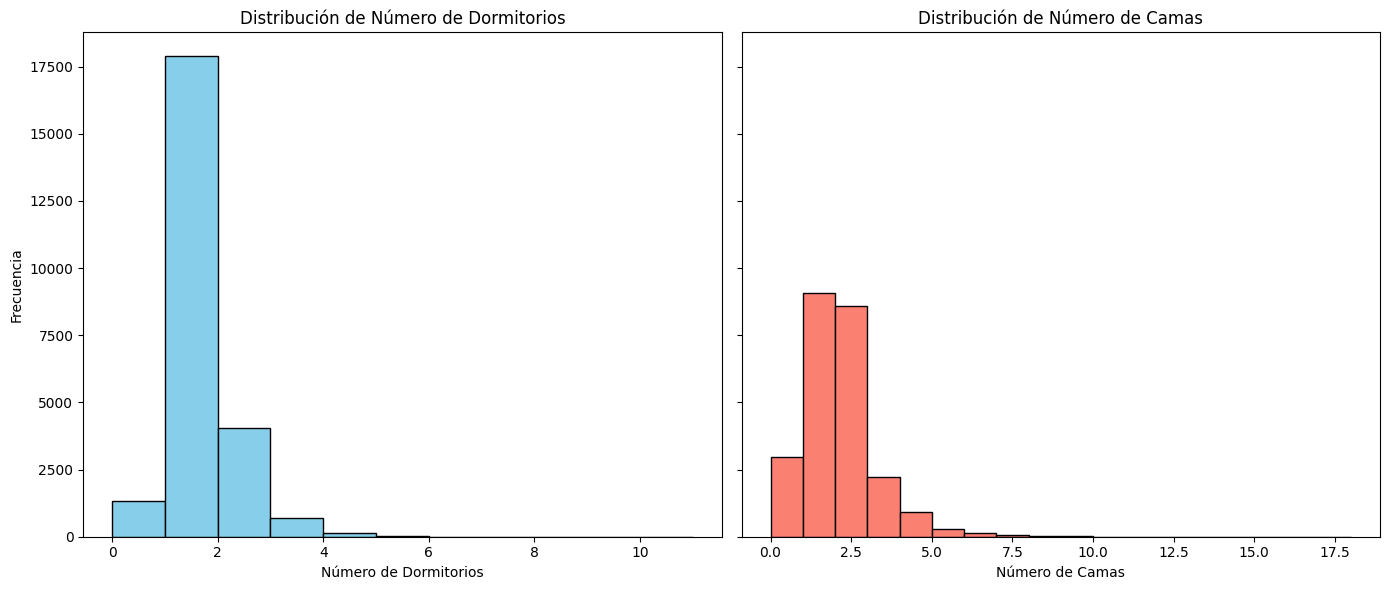

In [13]:
 # Crear figura con dos gráficos de barras para 'bedrooms' y 'beds'
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Histograma del número de dormitorios
axes[0].hist(df_list_de['bedrooms'].dropna(), bins=range(int(df_list_de['bedrooms'].max()) + 1), color='skyblue', edgecolor='black')
axes[0].set_title('Distribución de Número de Dormitorios')
axes[0].set_xlabel('Número de Dormitorios')
axes[0].set_ylabel('Frecuencia')

    # Histograma del número de camas
axes[1].hist(df_list_de['beds'].dropna(), bins=range(int(df_list_de['beds'].max()) + 1), color='salmon', edgecolor='black')
axes[1].set_title('Distribución de Número de Camas')
axes[1].set_xlabel('Número de Camas')

plt.tight_layout()
plt.show()


7. Relación entre el Tipo de Propiedad y la Ocupación

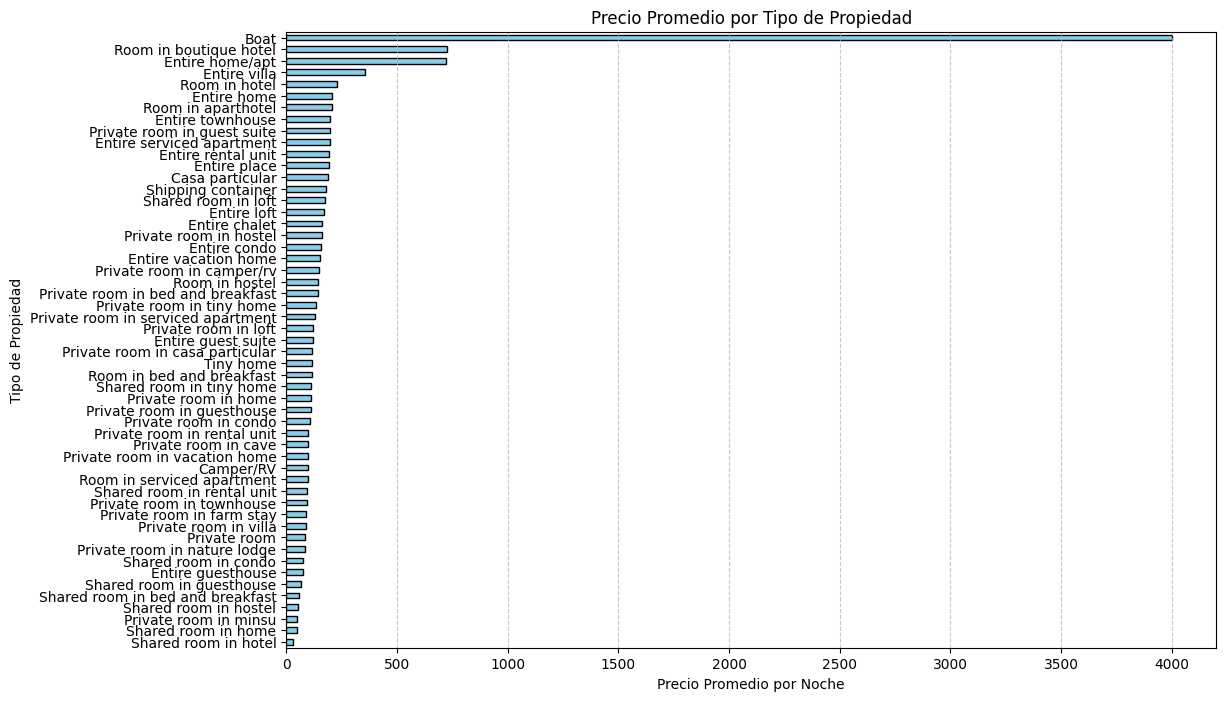

In [14]:
# Calcular el precio promedio por tipo de propiedad
average_price_by_property_type = df_list_de.groupby('property_type')['price'].mean().sort_values()

# Crear un gráfico de barras para mostrar el precio promedio por tipo de propiedad
plt.figure(figsize=(12, 8))
average_price_by_property_type.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Precio Promedio por Noche')
plt.ylabel('Tipo de Propiedad')
plt.title('Precio Promedio por Tipo de Propiedad')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

<Figure size 2400x800 with 0 Axes>

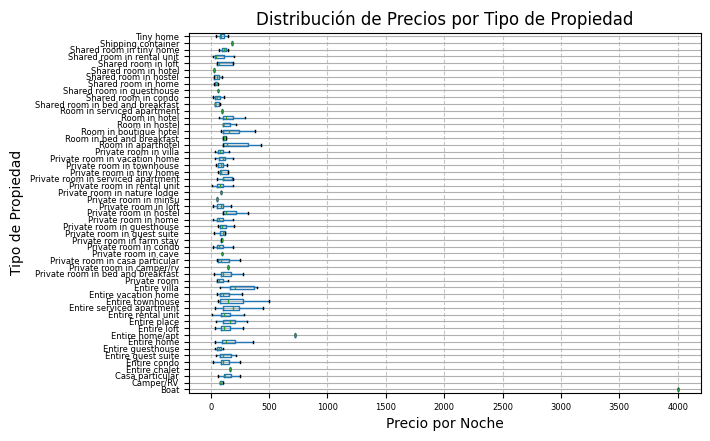

In [15]:
# Crear el gráfico boxplot de precios por tipo de propiedad
plt.figure(figsize=(24, 8))
df_list_de.boxplot(column='price', by='property_type', vert=False, showfliers=False, fontsize=6)
plt.xlabel('Precio por Noche')
plt.ylabel('Tipo de Propiedad')
plt.title('Distribución de Precios por Tipo de Propiedad')
plt.suptitle('')  # Elimina el título adicional generado por defecto
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

<Figure size 1200x800 with 0 Axes>

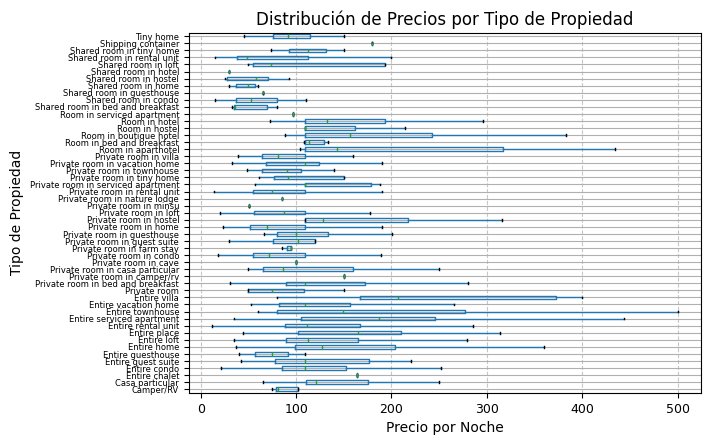

In [16]:
# Filtrar el dataset para excluir el tipo de propiedad 'Boat'
df_filtered = df_list_de[(df_list_de['property_type'] != 'Boat') & (df_list_de['property_type'] != 'Entire home/apt')]

# Crear el boxplot para mostrar la distribución de precios por tipo de propiedad excluyendo 'Boat'
plt.figure(figsize=(12, 8))
df_filtered.boxplot(column='price', by='property_type', vert=False, showfliers=False, fontsize=6)
plt.xlabel('Precio por Noche')
plt.ylabel('Tipo de Propiedad')
plt.title('Distribución de Precios por Tipo de Propiedad')
plt.suptitle('')  # Elimina el título adicional generado por defecto
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xticks(fontsize=9)
#plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.show()

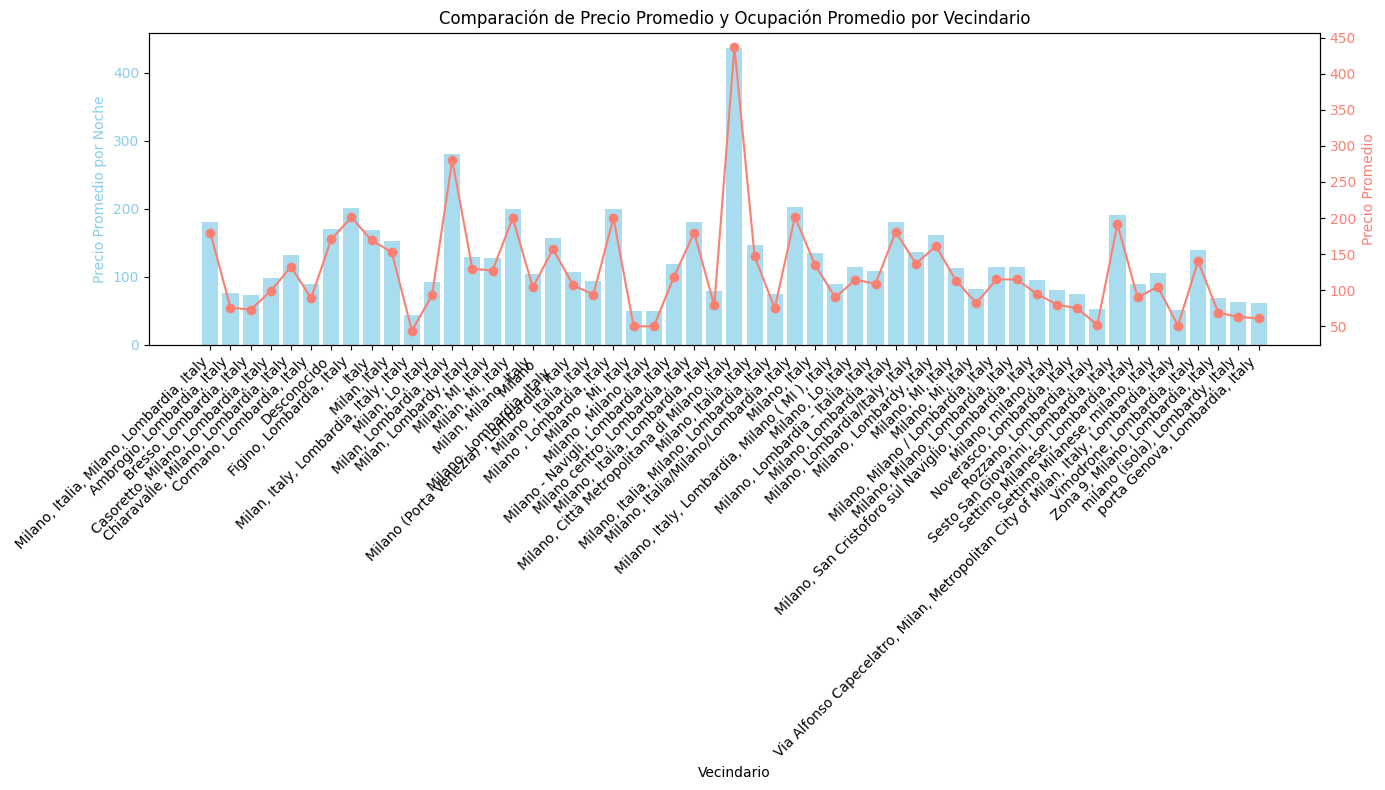

In [17]:
# Calcular el precio promedio por vecindario en df_list_de
price_by_neighbourhood = df_list_de.groupby('neighbourhood')['price'].mean().reset_index()

# Convertir la columna 'date' en df_calendar a formato datetime para obtener el mes
df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')

# Asumir que 'available' es una columna binaria (e.g., 't'/'f') y transformar a 1 (disponible) / 0 (ocupado)
df_calendar['available'] = df_calendar['available'].map({'t': 1, 'f': 0})
df_occupancy = df_calendar.groupby(['listing_id', 'month'])['available'].mean().reset_index()

# Calcular la ocupación promedio por vecindario en df_calendar
occupancy_by_neighbourhood = df_calendar.groupby('listing_id')['available'].mean().reset_index()
occupancy_by_neighbourhood['occupancy_rate'] = 1 - occupancy_by_neighbourhood['available']

# Calcular la ocupación promedio de cada vecindario por mes al combinar con df_list_de
df_combined = df_occupancy.merge(df_list_de[['id', 'neighbourhood', 'price']], left_on='listing_id', right_on='id', how='left')
df_neigh_occupancy = df_combined.groupby('neighbourhood').agg({'available': 'mean', 'price': 'mean'}).reset_index()
df_neigh_occupancy['occupancy_rate'] = 1 - df_neigh_occupancy['available']  # calcular la tasa de ocupación


# Combinar ocupación promedio por vecindario con precios, usando 'listing_id' para enlazar con df_list_de
merged_df = pd.merge(df_list_de[['id', 'neighbourhood']], occupancy_by_neighbourhood, left_on='id', right_on='listing_id')
avg_occupancy_neigh = merged_df.groupby('neighbourhood')['occupancy_rate'].mean().reset_index()

# Unir la ocupación promedio y precio promedio por vecindario en un solo DataFrame
combined_df = pd.merge(price_by_neighbourhood, avg_occupancy_neigh, on='neighbourhood')

# Gráfico de barras para precio promedio y ocupación promedio por vecindario
fig, ax1 = plt.subplots(figsize=(14, 8))

# Configurar un gráfico de barras para el precio promedio
ax1.bar(combined_df['neighbourhood'], combined_df['price'], color='skyblue', alpha=0.7, label='Precio Promedio')
ax1.set_xlabel('Vecindario')
ax1.set_ylabel('Precio Promedio por Noche', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(combined_df['neighbourhood'], rotation=45, ha='right')

# Graficar precio promedio en el mismo gráfico con otro eje
ax2 = ax1.twinx()
ax2.plot(df_neigh_occupancy['neighbourhood'], df_neigh_occupancy['price'], color='salmon', marker='o', label='Precio Promedio')
ax2.set_ylabel('Precio Promedio', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Título y leyenda
plt.title('Comparación de Precio Promedio y Ocupación Promedio por Vecindario')
fig.tight_layout()
plt.show()

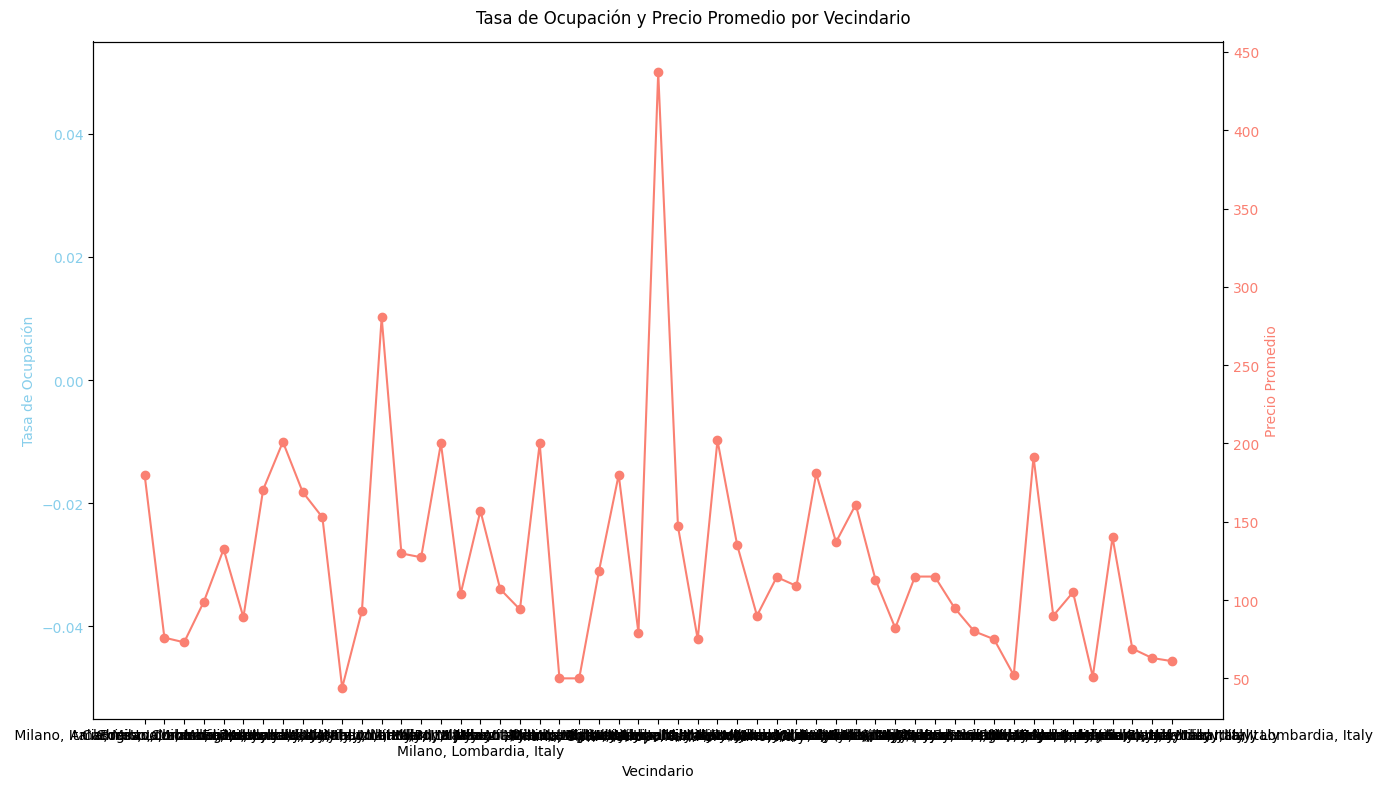

In [18]:
# Convertir la columna 'date' en df_calendar a formato de fecha
df_calendar['date'] = pd.to_datetime(df_calendar['date'], errors='coerce')

# Filtrar para datos recientes (opcional, ejemplo con el último año)
df_calendar = df_calendar[df_calendar['date'] >= '2023-01-01']

# Convertir 'price' a numérico en df_list_de, eliminando símbolos de moneda
df_list_de['price'] = pd.to_numeric(df_list_de['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Calcular la ocupación mensual promedio por vecindario
df_calendar['month'] = df_calendar['date'].dt.to_period('M')
df_calendar['available'] = df_calendar['available'].map({'t': 1, 'f': 0})  # 't' = disponible, 'f' = no disponible
df_occupancy = df_calendar.groupby(['listing_id', 'month'])['available'].mean().reset_index()

# Calcular la ocupación promedio de cada vecindario por mes al combinar con df_list_de
df_combined = df_occupancy.merge(df_list_de[['id', 'neighbourhood', 'price']], left_on='listing_id', right_on='id', how='left')
df_neigh_occupancy = df_combined.groupby('neighbourhood').agg({'available': 'mean', 'price': 'mean'}).reset_index()
df_neigh_occupancy['occupancy_rate'] = 1 - df_neigh_occupancy['available']  # calcular la tasa de ocupación

# Visualizar el resultado
import matplotlib.pyplot as plt

# Gráfico de barras para comparar ocupación promedio y precio promedio por vecindario
fig, ax1 = plt.subplots(figsize=(14, 8))

# Graficar ocupación promedio
ax1.bar(df_neigh_occupancy['neighbourhood'], df_neigh_occupancy['occupancy_rate'], color='skyblue', label='Tasa de Ocupación')
ax1.set_xlabel('Vecindario')
ax1.set_ylabel('Tasa de Ocupación', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Graficar precio promedio en el mismo gráfico con otro eje
ax2 = ax1.twinx()
ax2.plot(df_neigh_occupancy['neighbourhood'], df_neigh_occupancy['price'], color='salmon', marker='o', label='Precio Promedio')
ax2.set_ylabel('Precio Promedio', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# Título y ajustes
fig.suptitle('Tasa de Ocupación y Precio Promedio por Vecindario')
plt.xticks(rotation=45)
fig.tight_layout()

# Mostrar gráfico
plt.show()

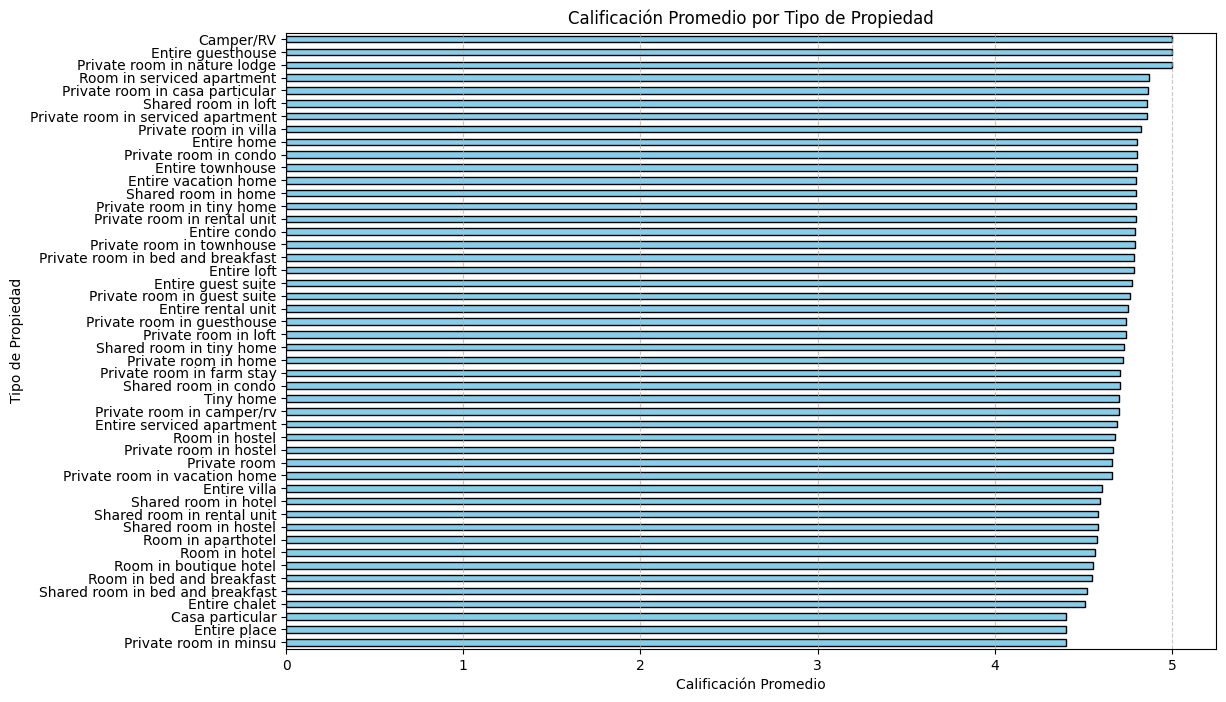

In [19]:
# Unir los datasets en base al ID del listado
df_combined = pd.merge(df_list_de, df_reviws_de, left_on='id', right_on='listing_id', how='inner')
# Calcular la calificación promedio por tipo de propiedad
average_rating_by_property_type = df_combined.groupby('property_type')['review_scores_rating'].mean().sort_values()

    # Crear gráfico de barras para visualizar los resultados
plt.figure(figsize=(12, 8))
average_rating_by_property_type.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Calificación Promedio')
plt.ylabel('Tipo de Propiedad')
plt.title('Calificación Promedio por Tipo de Propiedad')

    # Mostrar el gráfico
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()